# Heights and Weights Prediction Model
![](ht1.webp)

### Contents
* [**Abstract**](#abstract)
* [**Dataset**](#dataset)
* [**Importing Dataset and the required libraries**](#import)
* [**Plotting the Data Distribution**](#plot)
* [**Regressionn Models**](#part-b)
    * [Spliting the dataset](#train-test-split)
    * [Simple Linear Regression](#b1)
    * [Decision Tree Regressor](#b2)
    * [Random Forest Regressor](#b3)
    * [Lasso Regression](#b4)
    * [Ridge Regression](#b5)
* [**Conclusion**](#conclusion)

### Abstract
Height and weight prediction has been a popular problem in ergonomics study. In this paper, we reduce the dimension by principal component analysis and choose the best regression equation using various statistical criterion such as Residual Mean Square (RMSq), Mallow Cp and Akaike information criterion (AIC). Finally, compared with the real value, we analyze the fitting accuracy of the regression equation we proposed.

### Dataset
The dataset is collected from Kaggle website. Here is the link : https://www.kaggle.com/tmcketterick/heights-and-weights

The data contains the variables
- Height (m)
- Weight (kg)

<a id = 'import'></a>
### Importing the Dataset and the required libraries

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
# Loading Data
data = pd.read_csv('C:\\Users\\chand\\OneDrive\\Documents\\Heights_and_weights_prediction\\Dataset\\data.csv')
data

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


**Shape of the dataset**

In [3]:
data.shape

(15, 2)

**Correlation between the attributes of the dataset**

In [4]:
# Correlation 
data.corr()

,Height,Weight
Height,1.000000,0.994584
Weight,0.994584,1.000000


<a id = '1'></a>
### Plotting the Data Distribution

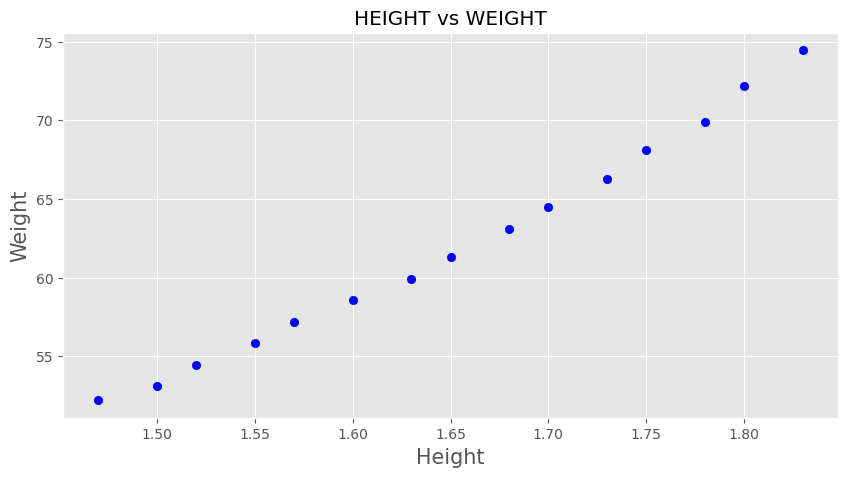

In [5]:
# Plotting data distribution
plt.figure(figsize=(10,5))
plt.title('HEIGHT vs WEIGHT')
plt.xlabel('Height', fontsize=15)
plt.ylabel('Weight', fontsize=15)
plt.scatter(data.Height, data.Weight, color='blue')
plt.show()

<a id = 'part-b'></a>
## Regression Models

Regression analysis consists of a set of machine learning methods that allow us to predict a continuous outcome variable (y) based on the value of one or multiple predictor variables (x). Briefly, the goal of regression model is to build a mathematical equation that defines y as a function of the x variables.

Here we are going to prepare several Regression machine learning models based on those we will do a comparative analysis that which model is better among them.

I have decided to go with five regression models to evaluate this dataset - 

* **Linear Regression** : Linear Regression is a machine learning algorithm based on supervised learning. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output).


* **Random Forest Regression** : Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. A Random Forest operates by constructing several decision trees during training time and outputting the mean of the classes as the prediction of all the trees.


* **Decision Tree Regression** : Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. Decision trees can handle both categorical and numerical data.


* **Lasso Regression** : In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.


* **Ridge Regression** : Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values.

Let's deploy the models...

<a id="train-test-split"></a>
**Training and Testing Dataset Spliting using the `train_test_split`**
  
  * Immporting the library from the sklearn.model_selection
  * Split the dataset into 75:25 ratio
  * x_train and y_train are the trainning datasets
  * x_test and y_test are the testing datasets
  * After the spliting of the datasets the model is ready to be prepared!

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [7]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(f'X_train: {X_train.shape}\nX_test: {X_test.shape}\ny_train: {y_train.shape}\ny_test: {y_test.shape}')

X_train: (11, 1)
X_test: (4, 1)
y_train: (11,)
y_test: (4,)


<a id = 'b1'></a>
### Simple Linear Regression
Linear Regression is a machine learning algorithm based on supervised learning. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output).

In [9]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [10]:
print(f'Coefficient: {regr.coef_}')
print(f'Intercept: {regr.intercept_}')

Coefficient: [61.65610384]
Intercept: -39.51671772684755


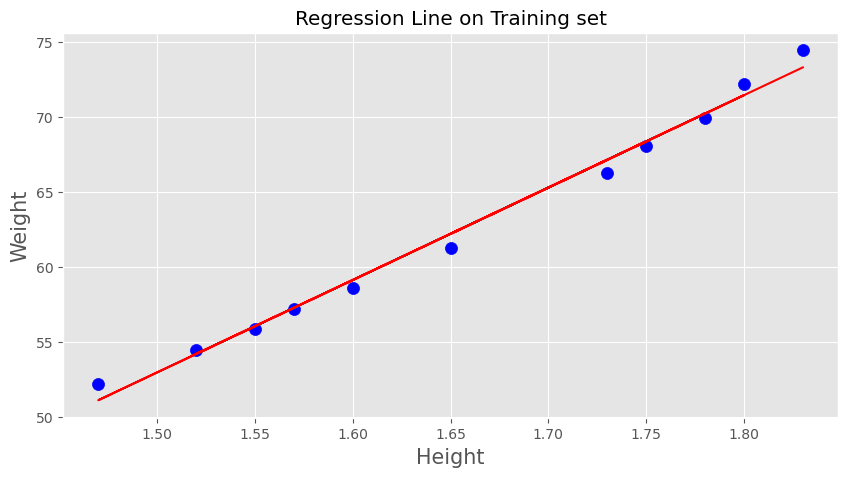

In [11]:
plt.figure(figsize=(10,5))
plt.title('Regression Line on Training set')
plt.xlabel('Height', fontsize=15)
plt.ylabel('Weight', fontsize=15)
plt.scatter(X_train, y_train,s=75, color='blue')
plt.plot(X_train, regr.predict(X_train), color='red')
plt.show()

In [12]:
y_pred = np.round(regr.predict(X_test), decimals=2)
pd.DataFrame({'Height': X_test[:,0], 'Actual Weight': y_test, 'Predicted Weight': y_pred})

,Height,Actual Weight,Predicted Weight
0,1.50,53.12,52.97
1,1.63,59.93,60.98
2,1.68,63.11,64.07
3,1.70,64.47,65.30


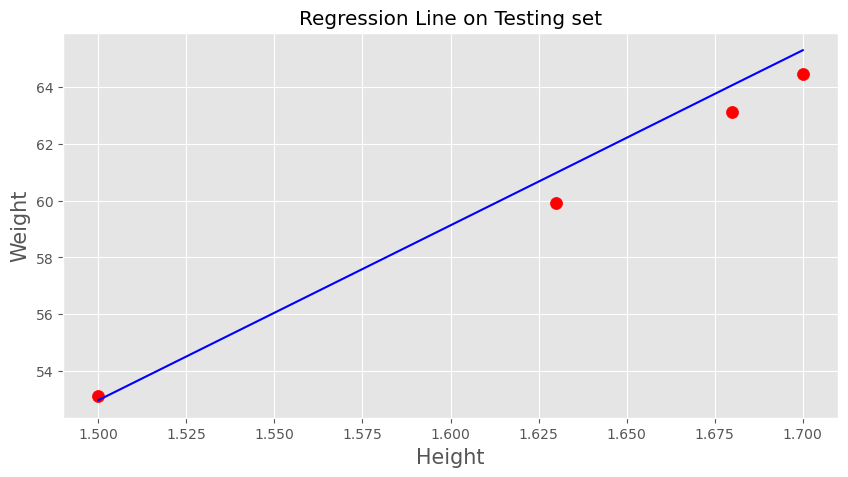

In [13]:
plt.figure(figsize=(10,5))
plt.title('Regression Line on Testing set')
plt.xlabel('Height', fontsize=15)
plt.ylabel('Weight', fontsize=15)
plt.scatter(X_test, y_test,s=75, color='red')
plt.plot(X_test, y_pred, color='blue')
plt.show()

In [14]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 0.747499999999997
Residual Sum of Squares(MSE): 0.6838749999999947
R2-Score: 0.9644246247142545


<a id = 'b2'></a>
### Decision Tree Regressor
Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. Decision trees can handle both categorical and numerical data.

In [15]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

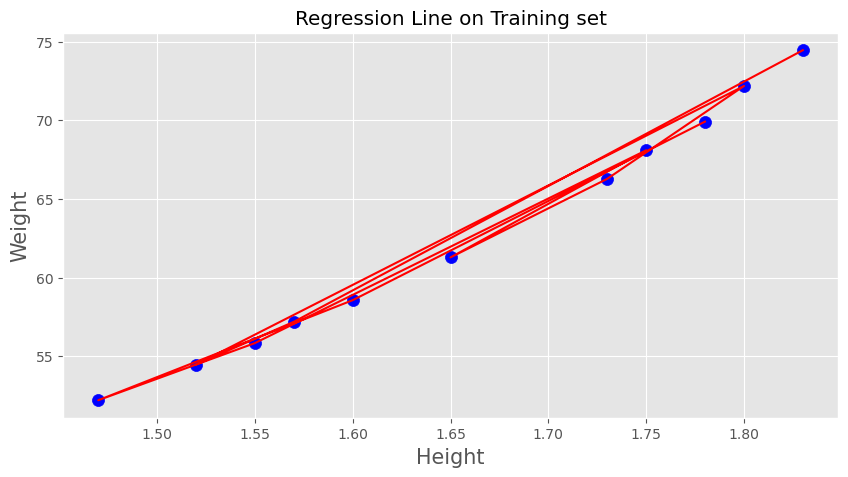

In [16]:
plt.figure(figsize=(10,5))
plt.title('Regression Line on Training set')
plt.xlabel('Height', fontsize=15)
plt.ylabel('Weight', fontsize=15)
plt.scatter(X_train, y_train,s=75, color='blue')
plt.plot(X_train, dtr.predict(X_train), color='red')
plt.show()

In [17]:
y_pred = np.round(dtr.predict(X_test), decimals=2)
pd.DataFrame({'Height': X_test[:,0], 'Actual Weight': y_test, 'Predicted Weight': y_pred})

,Height,Actual Weight,Predicted Weight
0,1.50,53.12,54.48
1,1.63,59.93,61.29
2,1.68,63.11,61.29
3,1.70,64.47,66.28


In [18]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 1.5875000000000004
Residual Sum of Squares(MSE): 2.5719250000000016
R2-Score: 0.8662077176650823


<a id = 'b3'></a>
### Random Forest Regression 
Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. A Random Forest operates by constructing several decision trees during training time and outputting the mean of the classes as the prediction of all the trees.

In [19]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

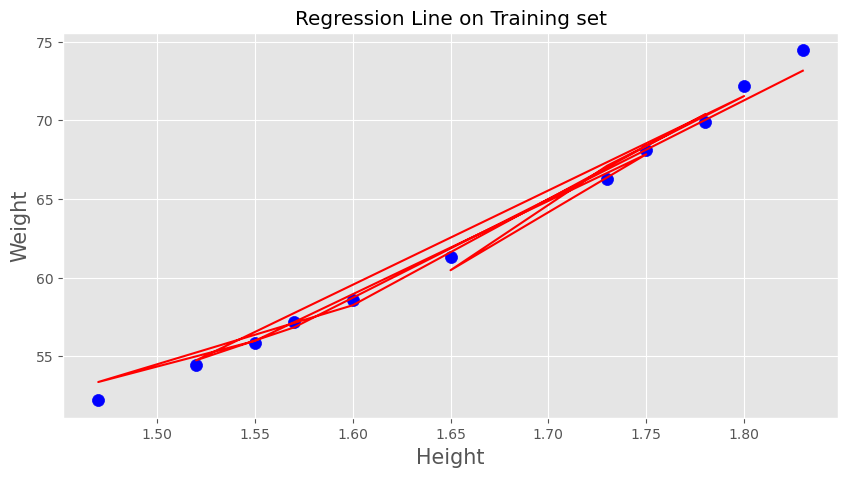

In [20]:
plt.figure(figsize=(10,5))
plt.title('Regression Line on Training set')
plt.xlabel('Height', fontsize=15)
plt.ylabel('Weight', fontsize=15)
plt.scatter(X_train, y_train,s=75, color='blue')
plt.plot(X_train, rfr.predict(X_train), color='red')
plt.show()

In [21]:
y_pred = np.round(rfr.predict(X_test), decimals=2)
pd.DataFrame({'Height': X_test[:,0], 'Actual Weight': y_test, 'Predicted Weight': y_pred})

,Height,Actual Weight,Predicted Weight
0,1.50,53.12,54.28
1,1.63,59.93,60.23
2,1.68,63.11,62.85
3,1.70,64.47,66.77


In [22]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 1.004999999999999
Residual Sum of Squares(MSE): 1.6982999999999981
R2-Score: 0.911653942829052


<a id = 'b4'></a>
### Lasso Regression
In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.

In [23]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

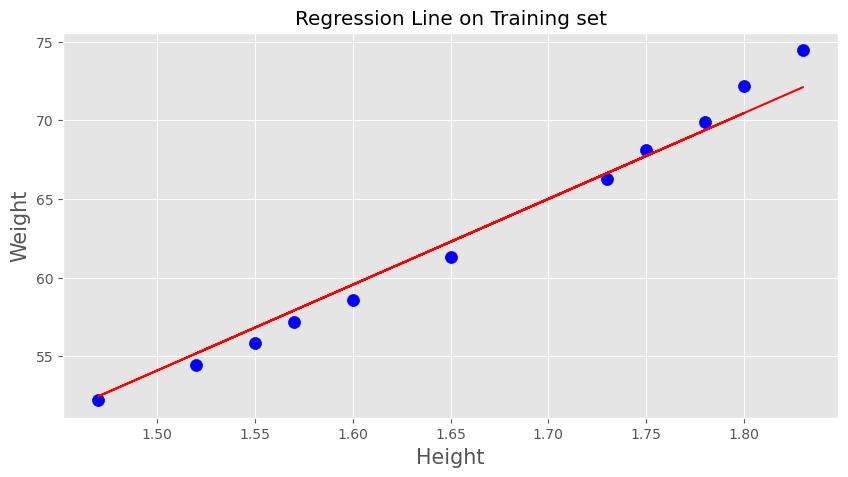

In [24]:
plt.figure(figsize=(10,5))
plt.title('Regression Line on Training set')
plt.xlabel('Height', fontsize=15)
plt.ylabel('Weight', fontsize=15)
plt.scatter(X_train, y_train,s=75, color='blue')
plt.plot(X_train, lasso.predict(X_train), color='red')
plt.show()

In [25]:
y_pred = np.round(lasso.predict(X_test), decimals=2)
pd.DataFrame({'Height': X_test[:,0], 'Actual Weight': y_test, 'Predicted Weight': y_pred})

,Height,Actual Weight,Predicted Weight
0,1.50,53.12,54.09
1,1.63,59.93,61.19
2,1.68,63.11,63.92
3,1.70,64.47,65.01


In [26]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 0.8950000000000031
Residual Sum of Squares(MSE): 0.8690500000000043
R2-Score: 0.9547917676591811


<a id = 'b5'></a>
### Ridge Regression

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values.

In [27]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

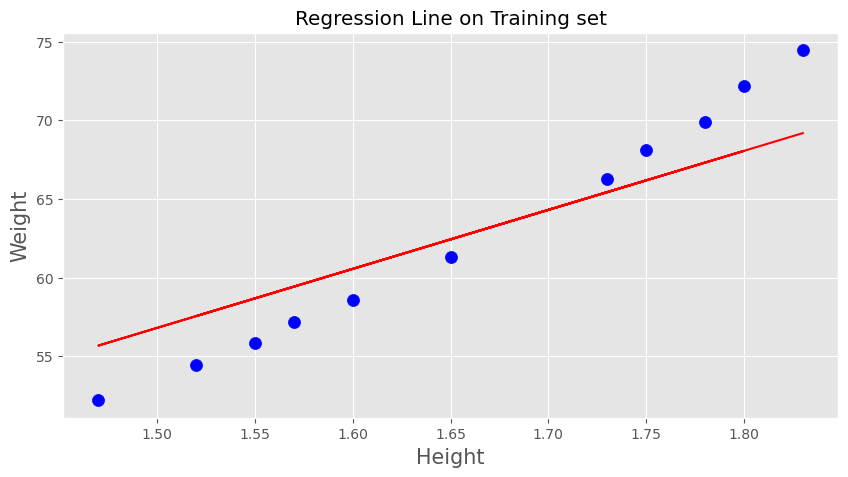

In [28]:
plt.figure(figsize=(10,5))
plt.title('Regression Line on Training set')
plt.xlabel('Height', fontsize=15)
plt.ylabel('Weight', fontsize=15)
plt.scatter(X_train, y_train,s=75, color='blue')
plt.plot(X_train, ridge.predict(X_train), color='red')
plt.show()

In [29]:
y_pred = np.round(ridge.predict(X_test), decimals=2)
pd.DataFrame({'Height': X_test[:,0], 'Actual Weight': y_test, 'Predicted Weight': y_pred})

,Height,Actual Weight,Predicted Weight
0,1.50,53.12,56.81
1,1.63,59.93,61.68
2,1.68,63.11,63.56
3,1.70,64.47,64.31


In [30]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 1.512500000000001
Residual Sum of Squares(MSE): 4.226675000000009
R2-Score: 0.7801271440893731


********

<a id="conclusion"></a>
### Comparative analysis among the algorithms for this project

We have deployed five machine learning algorithms and every algorithm is deployed successfully without any hesitation. We have checked the accuracy of the models based on the accuracy score of each of the models. Now let's take a look at the scores of each models.

|Name of the Model|Accuracy Score|
|:---:|:---:|
|Linear Regression|0.96|
|Decision Tree Regressor|0.87|
|Random Forest Regressor|0.94|
|Lasso Regression|0.95|
|Ridge Regression|0.78|

**Comparing all those scores scored by the machine learning algorithms, it is clear that Linear Regression is having the upper hand in case of this dataset and after this, we can use Lasso Regression, which is also having good score as compared to the other deployed algorithms**

Best Fitted Models ranking - 
1. Linear Regression
2. Lasso regression
3. Random forest regressor
4. Decision tree regressor
5. Ridge regressor



## Thank You!